In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
0,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.000000,329.0,650.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
1,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.000200,6569.0,11391.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
2,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.495733,NaN,NaN,NaN,NaN,...,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,UTILITY,Platinum
3,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,2.000517,4320.0,12059.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
4,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.979017,4245.0,13217.0,NaN,NaN,...,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838676,EUW1_6283483863,Red,anonymous 56,euw1,Annie,17.139450,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold
838677,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.688683,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Knight's Vow,UTILITY,Gold
838678,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.826867,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Glacial Buckler,UTILITY,Gold
838679,EUW1_6283483863,Red,anonymous 56,euw1,Annie,25.901700,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold


In [73]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
2889,EUW1_6274465314,Red,anonymous 129,euw1,Maokai,11.513217,6641.0,7209.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2920,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,8.982983,7920.0,7566.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2934,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,16.199850,7563.0,14015.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2940,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,19.408433,9840.0,5767.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2945,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,20.767800,9324.0,3640.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642404,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,16.234150,1901.0,12644.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642412,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,19.922367,12026.0,10604.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642417,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,21.353700,7798.0,11952.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642426,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,23.927567,13506.0,13848.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 1814 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

34 players died a total of 11955 times


In [6]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
3383,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,6.302467,7678.0,7550.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3396,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,13.837467,4684.0,8960.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3406,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,18.453517,7188.0,11508.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3417,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,22.972600,6200.0,10302.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3425,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,26.447450,7050.0,3032.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642390,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,9.020917,13136.0,1998.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642404,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,16.234150,1901.0,12644.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642412,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,19.922367,12026.0,10604.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642417,EUW1_6289301059,Blue,anonymous 165,euw1,Ekko,21.353700,7798.0,11952.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum


In [7]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 874 matches in which the jungler died at least once


In [8]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

34 players died a total of 5691 times on the blue side


In [74]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
2889,EUW1_6274465314,Red,anonymous 129,euw1,Maokai,11.513217,6641.0,7209.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2920,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,8.982983,7920.0,7566.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2934,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,16.199850,7563.0,14015.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2940,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,19.408433,9840.0,5767.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2945,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,20.767800,9324.0,3640.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642193,EUW1_6289606636,Red,anonymous 165,euw1,Elise,13.974000,9367.0,7246.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642197,EUW1_6289606636,Red,anonymous 165,euw1,Elise,15.285900,9388.0,2367.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642214,EUW1_6289606636,Red,anonymous 165,euw1,Elise,22.387483,8022.0,758.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642223,EUW1_6289606636,Red,anonymous 165,euw1,Elise,25.254867,4321.0,1702.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum


In [10]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 940 matches in which the jungler died at least once


In [11]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

34 players died a total of 6264 times on the red side


function to visualize the silhouette

In [4]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, cmap= "plasma", edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

function to visualize the results

In [5]:
def visualizeResults(df, data_scaled, model, team, silhouetteTitle):
    # Visualize the results
    image = plt.imread("../map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')
    title = "Clustering of Jungle Player Deaths " + team + "\n"
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    drawSillouette(data_scaled, model.labels_, silhouetteTitle)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))

function to view the average values in each cluster

In [6]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

---
### Clustering Red Side Junglers

In [75]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
2889,6641.0,7209.0,11.513217
2920,7920.0,7566.0,8.982983
2934,7563.0,14015.0,16.199850
2940,9840.0,5767.0,19.408433
2945,9324.0,3640.0,20.767800
...,...,...,...
642193,9367.0,7246.0,13.974000
642197,9388.0,2367.0,15.285900
642214,8022.0,758.0,22.387483
642223,4321.0,1702.0,25.254867


In [16]:
redSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6264 entries, 2889 to 642948
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  6264 non-null   float64
 1   coordinate_y  6264 non-null   float64
 2   timestamp     6264 non-null   float64
dtypes: float64(3)
memory usage: 195.8 KB


Normalize Data:

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-0.39600356, -0.00533738, -0.83083981],
       [-0.02483394,  0.09853628, -1.10730139],
       [-0.12843641,  1.97495427, -0.31876291],
       ...,
       [ 0.00476676, -1.8823373 ,  0.35731816],
       [-1.06927447, -1.60766858,  0.67061785],
       [-0.74918058,  1.02670707, -0.84907039]])

#### DBSCAN:

In [31]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

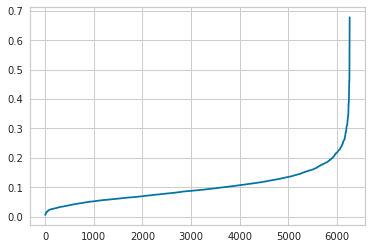

In [32]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [33]:
for eps in [0.15,0.2,0.25, 0.3]:
    for Nmin in [3, 4, 5,6, 7, 8, 9, 10, 15, 20, 30, 50]:
        db = DBSCAN(eps=eps, min_samples=Nmin).fit(data_scaled)
        nclusts=len(set(db.labels_))
        if nclusts>1:
            #Remember that the first cluster is NOISE!!! [-1]
            print("NMin: %2d Eps: %4.2f NClusters: %2d" %(Nmin, eps, nclusts), "-->", np.bincount(1+ db.labels_))
            print("Silhouette score: {}\n".format(silhouette_score(data_scaled, db.labels_)))

NMin:  3 Eps: 0.15 NClusters: 275 --> [1423 2633    4    8    5  252    8    7   24  287   53   15    3   15
   12   20    3    3    7   26    9   26   82   11    3    7   42    7
    8    3    9    3    3   10    4    3    4    5    7    3    3    8
    3    3    4    4    4    8    8    7    4    3    7   13    3    6
   11   27   13    6   13    5    7    4    3   17    3    7    3    3
    8    9    3    3    3    3    5    7   26    6    7    6   17    4
    7   10   12    9    5    5   10   17    7    6    8    6    4    4
    6   15   10    3    3    3    9    5   10    5    3    3    3    9
    4    4   21   14    4    6    8    9    3    3   13    5    9    5
    7    6    4    3    4    5    3    8    3    3    6    3    3    4
    3    4    3    5    3    3   16    4    7    3    3    3    4    3
    5    3    6    3    3    4    5    3    5   11    3    7    7    5
    3    5    6    3    3    7    4    5    9    3    5    6    3    4
    3    3    3    5    3    4    4    

In [38]:
dbscan = DBSCAN(min_samples=30, eps=0.25).fit(data_scaled)

In [39]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = dbscan.labels_
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp,cluster
2889,6641.0,7209.0,11.513217,1
2920,7920.0,7566.0,8.982983,1
2934,7563.0,14015.0,16.199850,-1
2940,9840.0,5767.0,19.408433,0
2945,9324.0,3640.0,20.767800,-1
...,...,...,...,...
642193,9367.0,7246.0,13.974000,-1
642197,9388.0,2367.0,15.285900,-1
642214,8022.0,758.0,22.387483,-1
642223,4321.0,1702.0,25.254867,-1


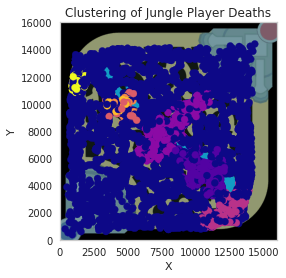

In [40]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(redSide_jungler_deaths_df['coordinate_x'], redSide_jungler_deaths_df['coordinate_y'], c=redSide_jungler_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

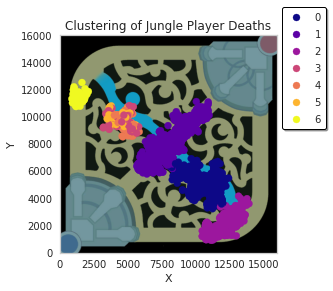

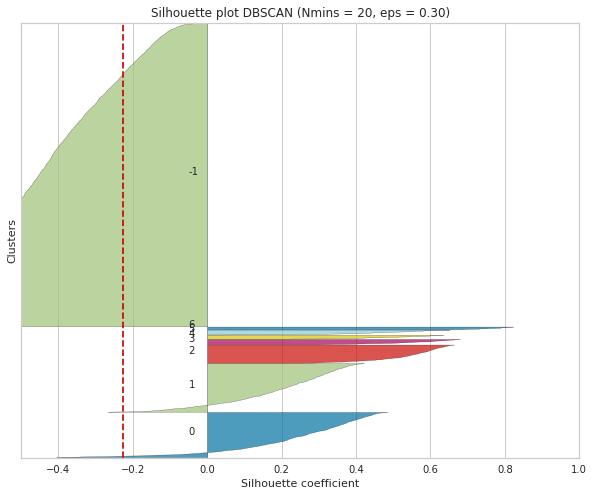

Silhouette score: -0.22743780609922942


In [41]:
noise_removed_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the red side", "DBSCAN (Nmin = 30, eps = 0.25)") 

In [42]:
clusterMeanValues_df= clusterMeanValues(noise_removed_df)
clusterMeanValues_df

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10479.958779,5156.433588,15.790763
1,1,8096.418440,8035.695035,17.991943
2,2,12102.569811,2089.898113,10.891911
3,3,4661.948718,9754.961538,10.435772
4,4,4925.155172,9567.206897,22.463979
5,5,4632.422535,9957.535211,17.147461
6,6,1384.333333,11504.476190,11.416099


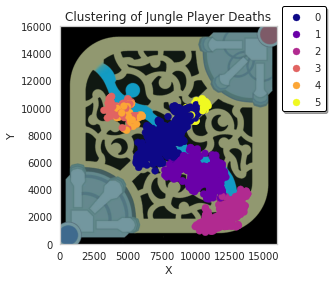

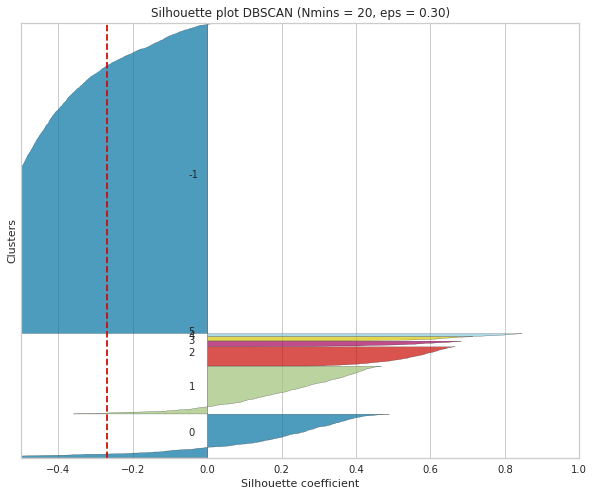

Silhouette score: -0.26856422509437083


In [45]:
dbscan = DBSCAN(min_samples=50, eps=0.30).fit(data_scaled)

redSide_jungler_deaths_df["cluster"] = dbscan.labels_

noise_removed_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the red side", "DBSCAN (Nmin = 50, eps = 0.30)") 

In [46]:
clusterMeanValues_df= clusterMeanValues(noise_removed_df)
clusterMeanValues_df

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7832.655008,7764.864865,16.694948
1,1,10409.474674,5153.137482,15.895900
2,2,11963.320144,2013.895683,10.778642
3,3,4579.625000,9904.675000,17.097697
4,4,4992.344262,9519.672131,10.696851
5,5,10133.425000,9920.300000,24.800638


---
### Clustering Blue Side Junglers

In [47]:
blueSide_jungler_deaths_df = blueSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
3383,7678.0,7550.0,6.302467
3396,4684.0,8960.0,13.837467
3406,7188.0,11508.0,18.453517
3417,6200.0,10302.0,22.972600
3425,7050.0,3032.0,26.447450
...,...,...,...
642390,13136.0,1998.0,9.020917
642404,1901.0,12644.0,16.234150
642412,12026.0,10604.0,19.922367
642417,7798.0,11952.0,21.353700


In [48]:
blueSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5691 entries, 3383 to 642426
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  5691 non-null   float64
 1   coordinate_y  5691 non-null   float64
 2   timestamp     5691 non-null   float64
dtypes: float64(3)
memory usage: 177.8 KB


Normalize Data:

In [49]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSide_jungler_deaths_df)
data_scaled

array([[ 0.02079909,  0.20105686, -1.38127303],
       [-0.83027557,  0.62391857, -0.57291456],
       [-0.11848835,  1.38806867, -0.07770247],
       ...,
       [ 1.25676188,  1.11695733,  0.07987647],
       [ 0.05491029,  1.52122513,  0.23343061],
       [ 1.67746679,  2.08983917,  0.50955628]])

#### DBSCAN:
Nmin >= dim

if dim > 2 -> Nmin = 2*dim

In [59]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

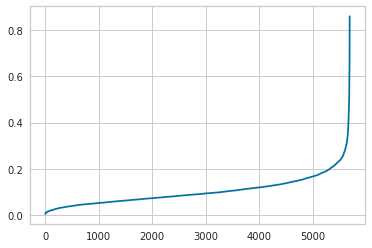

In [60]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [61]:
for eps in [0.18,0.2,0.25, 0.3]:
    for Nmin in [3, 4, 5,6, 7, 8, 9, 10, 15, 20, 30, 50]:
        db = DBSCAN(eps=eps, min_samples=Nmin).fit(data_scaled)
        nclusts=len(set(db.labels_))
        if nclusts>1:
            #Remember that the first cluster is NOISE!!! [-1]
            print("NMin: %2d Eps: %4.2f NClusters: %2d" %(Nmin, eps, nclusts), "-->", np.bincount(1+ db.labels_))
            print("Silhouette score: {}\n".format(silhouette_score(data_scaled, db.labels_)))

NMin:  3 Eps: 0.18 NClusters: 159 --> [ 825 3877    5    6   15   32   79    8    7   38    3    3   13    7
    3   16    5    7    3    5    6    4    4    4    6    4    5    7
    4    6    3   58    3    7    7    3    5   10    3    4    4    4
    4    3   16    5    6    6    7    7   13    4    7    4    3    4
    6    3    4    5    3    3    3    8    3    4    4    7   11    4
   12    3    9   10    5    5    8    6    7    5   10    8    5    6
    3    4    5   15    3    3   11    8   11    4    4    3    3    6
    3    3    7    7    3    3    6    5    3    8    3    3    5    3
    3    6    3    3    6    4    3    5    3    3    3    3    5    6
    3    3    5    4    5    3    8    3    4    3    3    4    3    4
    3    3    4    4    3    3    3    4    3    4    3    3    3    3
    3    3    3    3    3]
Silhouette score: -0.5018442140766548

NMin:  4 Eps: 0.18 NClusters: 108 --> [1178 3707    4    6   15   78   14    6   14    5   10    6   26    4
    6 

In [62]:
dbscan = DBSCAN(min_samples=20, eps=0.20).fit(data_scaled)

In [63]:
# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = dbscan.labels_
blueSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp,cluster
3383,7678.0,7550.0,6.302467,0
3396,4684.0,8960.0,13.837467,-1
3406,7188.0,11508.0,18.453517,-1
3417,6200.0,10302.0,22.972600,-1
3425,7050.0,3032.0,26.447450,-1
...,...,...,...,...
642390,13136.0,1998.0,9.020917,-1
642404,1901.0,12644.0,16.234150,-1
642412,12026.0,10604.0,19.922367,-1
642417,7798.0,11952.0,21.353700,-1


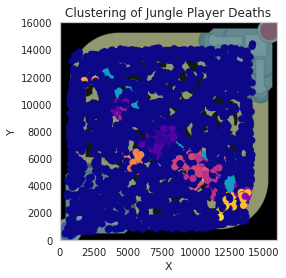

In [64]:
# Visualize the results
image = plt.imread("../map11.png")
fig, ax = plt.subplots()
ax.imshow(image, extent=[0, 16000, 0, 16000])

ax.scatter(blueSide_jungler_deaths_df['coordinate_x'], blueSide_jungler_deaths_df['coordinate_y'], c=blueSide_jungler_deaths_df['cluster'], cmap="plasma")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Jungle Player Deaths')
plt.grid(visible=None)
plt.show()

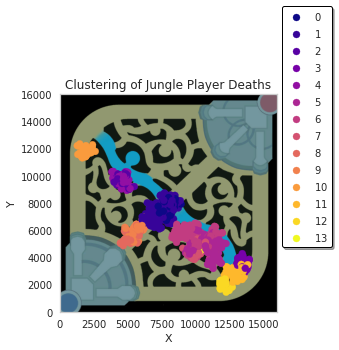

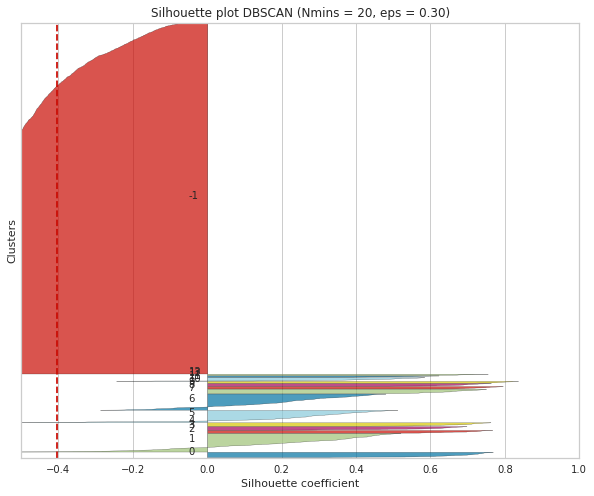

Silhouette score: -0.4042874127341869


In [65]:
noise_removed_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the blue side", "DBSCAN (Nmin = 20, random_state = 0.20)")   

In [66]:
clusterMeanValues_df = clusterMeanValues(noise_removed_df)
clusterMeanValues_df

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7762.500000,7642.128571,5.023041
1,1,7348.223577,7326.357724,14.040666
2,2,4614.361111,9646.416667,17.184808
3,3,13464.666667,3517.625000,7.753072
4,4,4646.645833,9787.583333,10.612252
5,5,10612.300000,4742.887500,13.135516
6,6,9898.649533,5391.859813,18.342554
7,7,10068.350000,4728.333333,25.363091
8,8,5256.272727,5527.181818,24.970957
9,9,5599.135135,5977.891892,16.594015


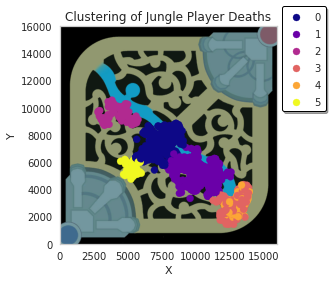

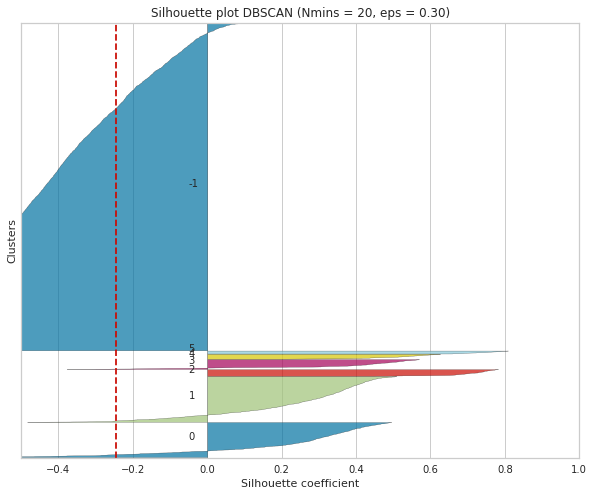

Silhouette score: -0.24502406437326957
Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7386.245119,7321.958785,12.116031
1,1,10130.362126,5141.327243,16.867858
2,2,4293.318182,9630.897727,10.654301
3,3,12884.844961,2928.317829,12.595070
4,4,13086.044776,3029.582090,6.850171
5,5,5346.100000,5508.725000,17.003034


In [67]:
dbscan = DBSCAN(min_samples=50, eps=0.30).fit(data_scaled)

blueSide_jungler_deaths_df["cluster"] = dbscan.labels_

noise_removed_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the blue side", "DBSCAN (Nmin = 50, random_state = 0.30)")  

clusterMeanValues_df = clusterMeanValues(noise_removed_df)
clusterMeanValues_df

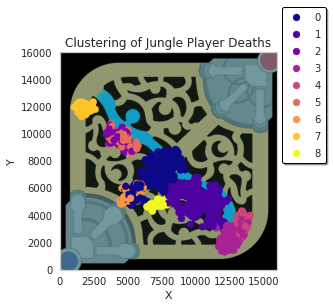

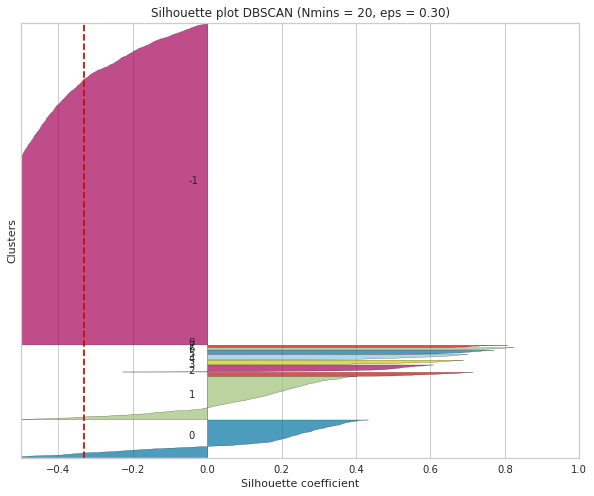

Silhouette score: -0.3300345414112181
Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7192.905242,7120.122984,12.768644
1,1,10133.495606,5064.077329,17.059739
2,2,4405.792453,9721.226415,17.371263
3,3,12769.734043,2687.712766,13.373533
4,4,13426.716667,3414.116667,7.832578
5,5,4584.347222,9741.541667,10.758598
6,6,5269.924528,5543.660377,25.426981
7,7,1835.066667,11830.366667,10.246722
8,8,7221.866667,4836.500000,18.356599


In [70]:
dbscan = DBSCAN(min_samples=30, eps=0.25).fit(data_scaled)

blueSide_jungler_deaths_df["cluster"] = dbscan.labels_

noise_removed_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the blue side", "DBSCAN (Nmin = 30, random_state = 0.25)")  

clusterMeanValues_df = clusterMeanValues(noise_removed_df)
clusterMeanValues_df

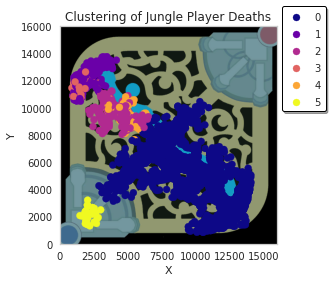

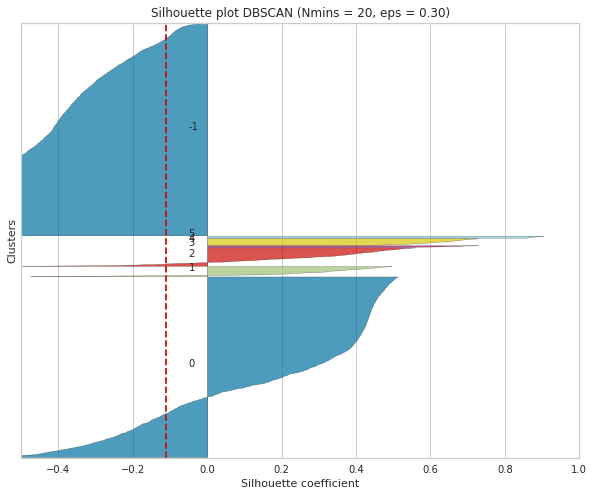

Silhouette score: -0.11057375781872153
Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9231.086664,5397.437526,15.845410
1,1,2230.834586,12155.669173,10.860397
2,2,4240.979424,9581.456790,13.455479
3,3,1571.320000,11515.840000,16.235169
4,4,4904.494505,9513.131868,23.971164
5,5,2179.933333,2121.966667,29.438887


In [71]:
dbscan = DBSCAN(min_samples=30, eps=0.30).fit(data_scaled)

blueSide_jungler_deaths_df["cluster"] = dbscan.labels_

noise_removed_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["cluster"] != -1]

visualizeResults(noise_removed_df, data_scaled, dbscan, "on the blue side", "DBSCAN (Nmin = 30, random_state = 0.30)")  

clusterMeanValues_df = clusterMeanValues(noise_removed_df)
clusterMeanValues_df

---

### Clustering by division - K-Means Model

#### | Division - Iron |

**Red Side**

In [7]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

In [8]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
94713,EUW1_6283747670,Red,anonymous 2,euw1,Rammus,4.360700,4013.0,9949.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
94718,EUW1_6283747670,Red,anonymous 2,euw1,Rammus,7.853883,4379.0,13680.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
94725,EUW1_6283747670,Red,anonymous 2,euw1,Rammus,10.479500,13254.0,3690.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
94729,EUW1_6283747670,Red,anonymous 2,euw1,Rammus,12.930233,3624.0,13393.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
94732,EUW1_6283747670,Red,anonymous 2,euw1,Rammus,14.751167,10017.0,4683.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622381,EUW1_6289184463,Red,anonymous 15,euw1,Hecarim,10.132933,1243.0,11082.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
622383,EUW1_6289184463,Red,anonymous 15,euw1,Hecarim,11.951633,8302.0,2158.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
622388,EUW1_6289184463,Red,anonymous 15,euw1,Hecarim,13.824533,9767.0,4849.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
622407,EUW1_6289184463,Red,anonymous 15,euw1,Hecarim,22.048467,8478.0,13486.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron


In [9]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 103 matches in which the jungler died at least once


In [10]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

4 players died a total of 679 times on the red side


In [11]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
94713,4013.0,9949.0,4.360700
94718,4379.0,13680.0,7.853883
94725,13254.0,3690.0,10.479500
94729,3624.0,13393.0,12.930233
94732,10017.0,4683.0,14.751167
...,...,...,...
622381,1243.0,11082.0,10.132933
622383,8302.0,2158.0,11.951633
622388,9767.0,4849.0,13.824533
622407,8478.0,13486.0,22.048467


Normalize Data:

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-1.38745349,  0.79941824, -1.69874683],
       [-1.2744259 ,  1.93255242, -1.30698636],
       [ 1.46633866, -1.10148951, -1.01252348],
       ...,
       [ 0.3894884 , -0.74949206, -0.63737803],
       [-0.0085787 ,  1.87363308,  0.284936  ],
       [-0.24389843,  1.91432994,  0.69510775]])

In [13]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2822286825714548
Silhouette score for k=3: 0.3012377596130556
Silhouette score for k=4: 0.33074551884132036
Silhouette score for k=5: 0.2933895009363098
Silhouette score for k=6: 0.29853064256974643
Silhouette score for k=7: 0.2960833198409456
Silhouette score for k=8: 0.2940794921308632
Silhouette score for k=9: 0.2810068797766234
Silhouette score for k=10: 0.285702270060541
Silhouette score for k=11: 0.27683478457836025
Silhouette score for k=12: 0.2645152052626166
Silhouette score for k=13: 0.27870706384802174
Silhouette score for k=14: 0.25723378616670334
Silhouette score for k=15: 0.25650727041911503
Silhouette score for k=16: 0.25645187633753175
Silhouette score for k=17: 0.2712318598646031
Silhouette score for k=18: 0.2650869172214736
Silhouette score for k=19: 0.2598560831013671
Silhouette score for k=20: 0.2683256933949339
Silhouette score for k=25: 0.27839782070391184


K-Means with k = 4

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


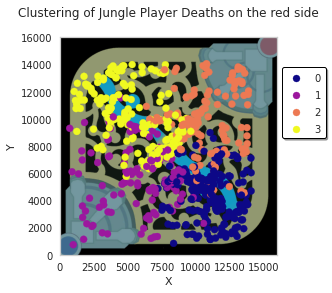

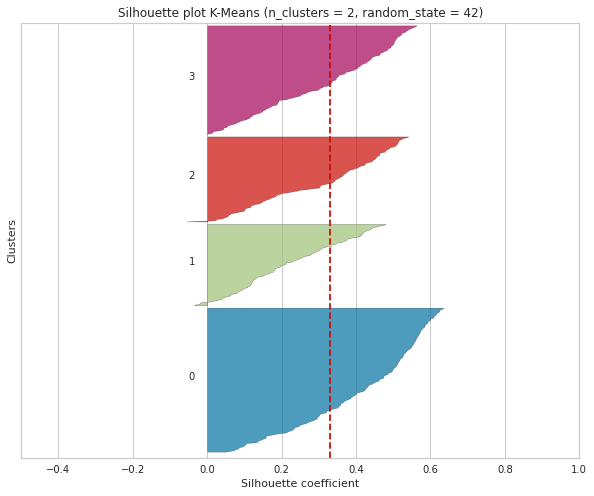

Silhouette score: 0.33074551884132036

Inertia: 816.539139589876

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10934.347639,4586.296137,14.574172
1,1,5808.757576,5781.204545,27.226548
2,2,10728.594203,9858.811594,28.375706
3,3,5570.562500,10090.164773,13.296936


In [15]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

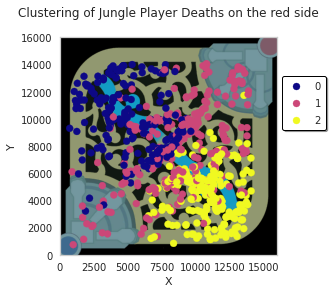

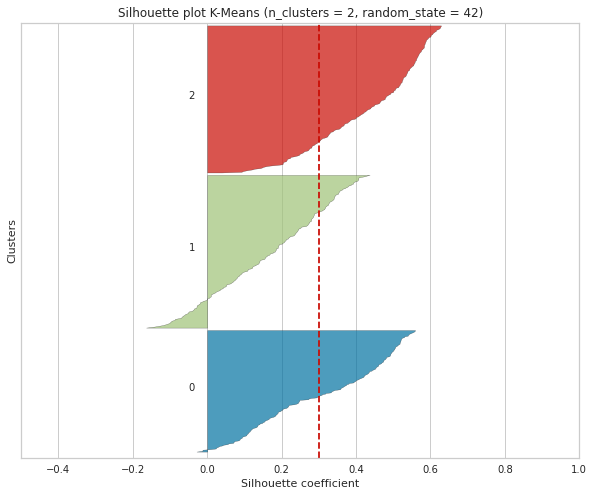

Silhouette score: 0.3012377596130556

Inertia: 1049.3927474591355

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5322.362245,9775.102041,14.314213
1,1,8785.455285,7978.995935,28.488492
2,2,10848.181435,4596.447257,14.481181


In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

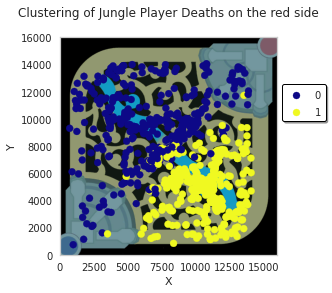

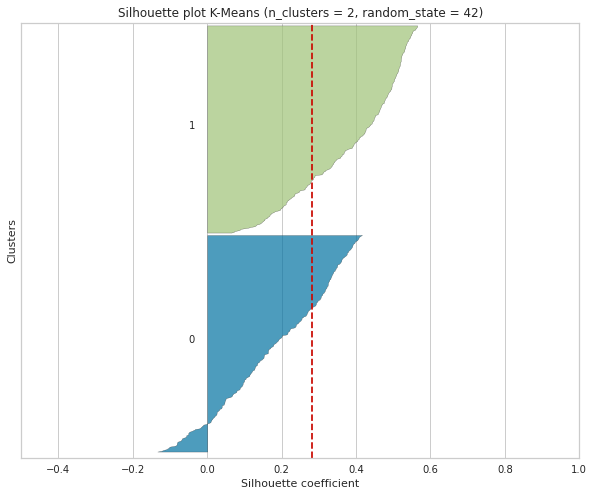

Silhouette score: 0.2822286825714548

Inertia: 1424.480468663395

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6638.334294,9546.25072,21.901146
1,1,10457.596386,4986.63253,17.006316


In [17]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

#### | Division - Bronze |

**Red Side**

In [30]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

In [31]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
372047,EUW1_6284317555,Red,anonymous 90,euw1,Amumu,12.141350,3804.0,13366.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
372050,EUW1_6284317555,Red,anonymous 90,euw1,Amumu,14.361850,13161.0,4171.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
372057,EUW1_6284317555,Red,anonymous 90,euw1,Amumu,16.785033,8246.0,8589.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
372061,EUW1_6284317555,Red,anonymous 90,euw1,Amumu,18.858500,7632.0,13411.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
372069,EUW1_6284317555,Red,anonymous 90,euw1,Amumu,22.271050,12950.0,11298.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634930,EUW1_6289869790,Red,anonymous 96,euw1,RekSai,28.544500,8150.0,7954.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
634937,EUW1_6289869790,Red,anonymous 96,euw1,RekSai,31.493167,11732.0,11910.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
636766,EUW1_6289787125,Red,anonymous 106,euw1,Nunu,18.784133,11652.0,3421.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze
636941,EUW1_6289630475,Red,anonymous 106,euw1,Nunu,10.592500,5350.0,9110.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Bronze


In [32]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 211 matches in which the jungler died at least once


In [33]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

8 players died a total of 1490 times on the red side


In [34]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
372047,3804.0,13366.0,12.141350
372050,13161.0,4171.0,14.361850
372057,8246.0,8589.0,16.785033
372061,7632.0,13411.0,18.858500
372069,12950.0,11298.0,22.271050
...,...,...,...
634930,8150.0,7954.0,28.544500
634937,11732.0,11910.0,31.493167
636766,11652.0,3421.0,18.784133
636941,5350.0,9110.0,10.592500


Normalize Data:

In [35]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-1.21234616,  1.76935189, -0.78553002],
       [ 1.51975736, -0.89778664, -0.55236369],
       [ 0.08465115,  0.38371613, -0.29791434],
       ...,
       [ 1.07915201, -1.11533465, -0.08799639],
       [-0.76093737,  0.53483948, -0.94816892],
       [-1.30782525,  0.78342433, -0.80558096]])

In [36]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.26130593279662906
Silhouette score for k=3: 0.29479910270697673
Silhouette score for k=4: 0.33885652457522236
Silhouette score for k=5: 0.292278898904431
Silhouette score for k=6: 0.29472613895563
Silhouette score for k=7: 0.29621833625577965
Silhouette score for k=8: 0.2877984857477835
Silhouette score for k=9: 0.2834775665129148
Silhouette score for k=10: 0.2817640949661337
Silhouette score for k=11: 0.27615374011636173
Silhouette score for k=12: 0.26657715760615525
Silhouette score for k=13: 0.2650307202625749
Silhouette score for k=14: 0.26811178119190565
Silhouette score for k=15: 0.2545067155836551
Silhouette score for k=16: 0.25486509533027196
Silhouette score for k=17: 0.25662615809309736
Silhouette score for k=18: 0.2515433126965422
Silhouette score for k=19: 0.26112060660321884
Silhouette score for k=20: 0.25702207200913496
Silhouette score for k=25: 0.2641496247163287


K-Means with k = 4

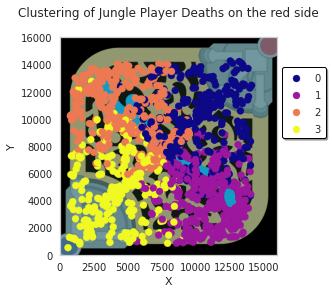

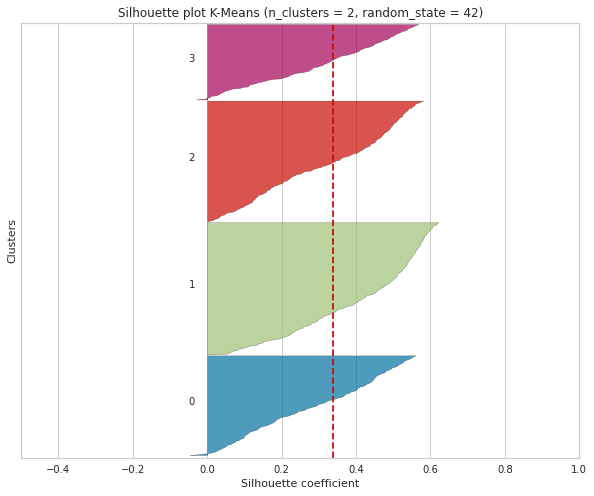

Silhouette score: 0.33885652457522236

Inertia: 1749.535195044218

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10200.360231,9638.645533,28.457578
1,1,10705.891304,4268.954348,14.309058
2,2,5305.876190,9992.921429,12.883284
3,3,4417.726236,5023.505703,28.019275


In [37]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

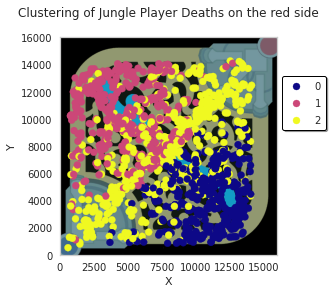

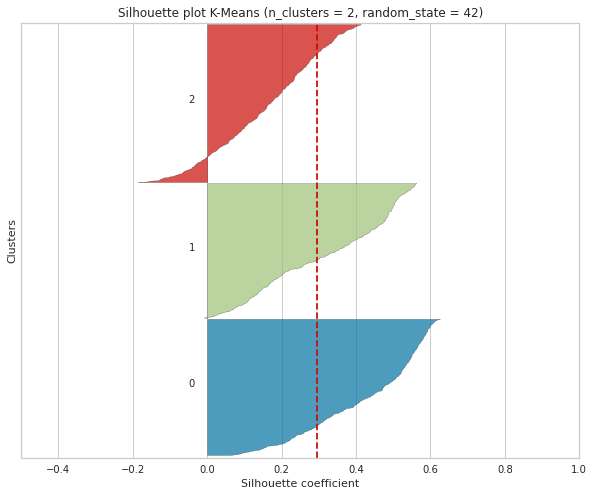

Silhouette score: 0.29479910270697673

Inertia: 2383.78435187395

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10694.591966,4290.651163,14.425705
1,1,5242.679487,9764.130342,13.624389
2,2,7909.743169,7700.267760,29.212064


In [38]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

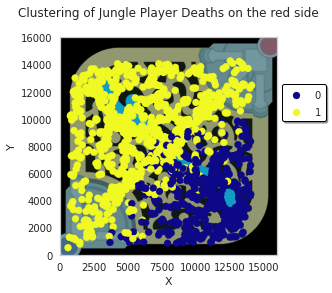

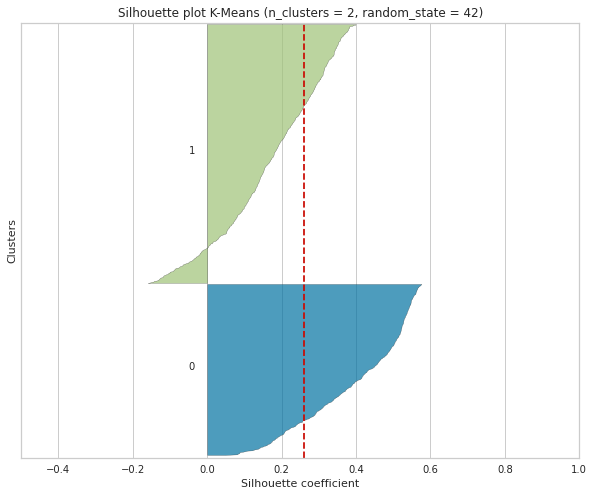

Silhouette score: 0.26130593279662906

Inertia: 3234.075871297342

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10375.812816,4719.355818,15.259858
1,1,6356.419175,8949.788183,22.506019


In [39]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 7

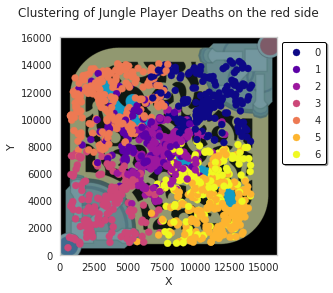

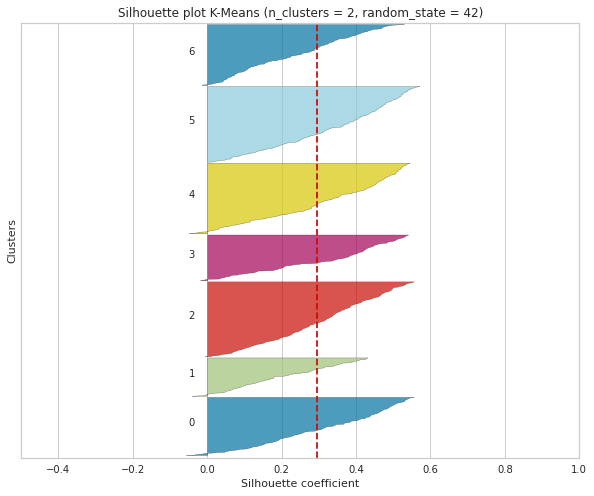

Silhouette score: 0.29621833625577965

Inertia: 1201.1953932492581

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10705.926471,11317.235294,27.795071
1,1,6089.777778,8334.555556,31.611742
2,2,7722.790875,7324.444867,13.292625
3,3,3533.192547,3865.552795,27.090070
4,4,4035.991935,11187.701613,12.575321
5,5,11288.815094,3611.735849,11.309512
6,6,10542.224299,5197.728972,24.888102


In [40]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

#### | Division - Silver |

**Red Side**

In [18]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

In [19]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
17265,EUW1_6280166048,Red,anonymous 141,euw1,Amumu,9.028450,6654.0,4771.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
17270,EUW1_6280166048,Red,anonymous 141,euw1,Amumu,11.092467,2268.0,9910.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
17279,EUW1_6280166048,Red,anonymous 141,euw1,Amumu,15.345767,3558.0,10579.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
17282,EUW1_6280166048,Red,anonymous 141,euw1,Amumu,16.801517,4941.0,4742.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
17288,EUW1_6280166048,Red,anonymous 141,euw1,Amumu,18.162467,8189.0,5163.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632258,EUW1_6287909210,Red,anonymous 81,euw1,Ekko,26.688667,4051.0,2230.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
632262,EUW1_6287909210,Red,anonymous 81,euw1,Ekko,28.164217,9910.0,5887.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
632267,EUW1_6287909210,Red,anonymous 81,euw1,Ekko,30.177883,4817.0,9158.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver
632278,EUW1_6287909210,Red,anonymous 81,euw1,Ekko,35.232717,3441.0,2548.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Silver


In [20]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 252 matches in which the jungler died at least once


In [21]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

8 players died a total of 1764 times on the red side


In [22]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
17265,6654.0,4771.0,9.028450
17270,2268.0,9910.0,11.092467
17279,3558.0,10579.0,15.345767
17282,4941.0,4742.0,16.801517
17288,8189.0,5163.0,18.162467
...,...,...,...
632258,4051.0,2230.0,26.688667
632262,9910.0,5887.0,28.164217
632267,4817.0,9158.0,30.177883
632278,3441.0,2548.0,35.232717


Normalize Data:

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-0.27974359, -0.65368021, -1.10640966],
       [-1.50431994,  0.79815316, -0.88367862],
       [-1.14415042,  0.98715424, -0.42469883],
       ...,
       [-0.79263615,  0.58570352,  1.17585643],
       [-1.17681696, -1.2817062 ,  1.72133084],
       [-1.6137668 ,  0.13905076,  1.92197421]])

In [52]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2568031859958905
Silhouette score for k=3: 0.2781153850576221
Silhouette score for k=4: 0.2962087158129117
Silhouette score for k=5: 0.279781468975744
Silhouette score for k=6: 0.28494122325609156
Silhouette score for k=7: 0.2971589058030089
Silhouette score for k=8: 0.29444639374084475
Silhouette score for k=9: 0.29713165994666313
Silhouette score for k=10: 0.297516241228692
Silhouette score for k=11: 0.27724242564118534
Silhouette score for k=12: 0.285586011132697
Silhouette score for k=13: 0.2757428365009215
Silhouette score for k=14: 0.2845053070502665
Silhouette score for k=15: 0.27509534162092736
Silhouette score for k=16: 0.2808455800488879
Silhouette score for k=17: 0.2757431479190256
Silhouette score for k=18: 0.27933740226225257
Silhouette score for k=19: 0.2835143641046526
Silhouette score for k=20: 0.2753817563867384
Silhouette score for k=25: 0.27689896211653386


K-Means with k = 4

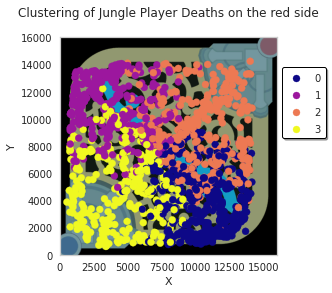

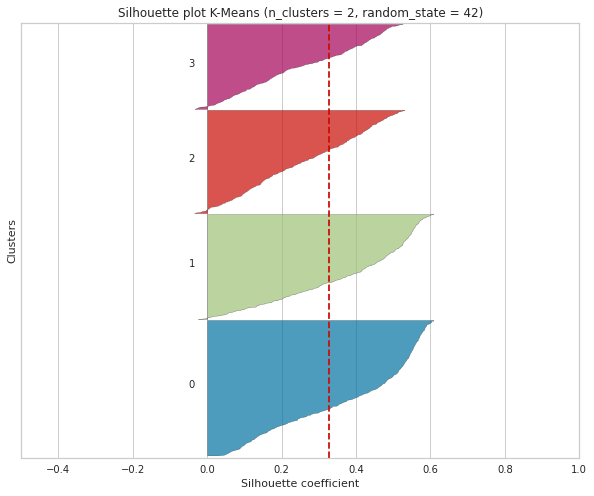

Silhouette score: 0.3280442215708613

Inertia: 2076.2872982112417

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10270.917415,4284.892280,12.511287
1,1,4119.912037,10601.733796,13.559566
2,2,10260.783529,8809.225882,27.026188
3,3,4695.848571,5105.842857,27.713493


In [25]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

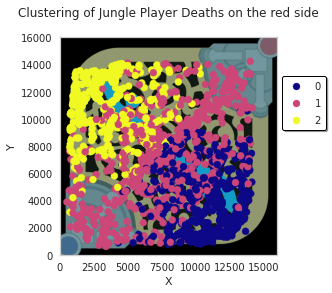

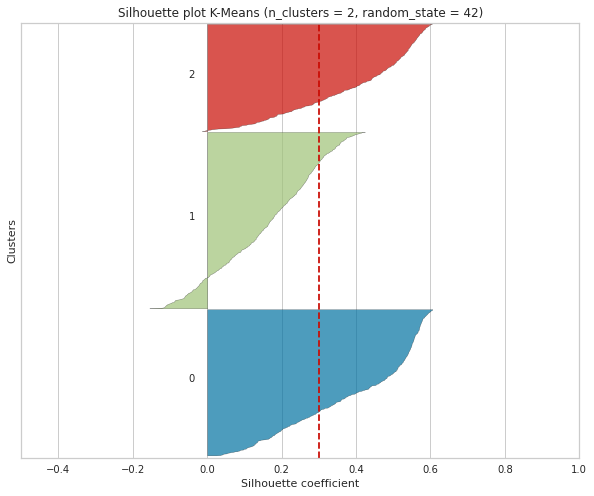

Silhouette score: 0.30041206785490066

Inertia: 2694.2116924715842

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10355.436667,4404.135000,13.086970
1,1,7673.508287,7243.740331,27.782547
2,2,3945.911364,10478.752273,13.740059


In [26]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

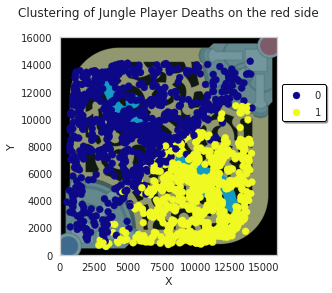

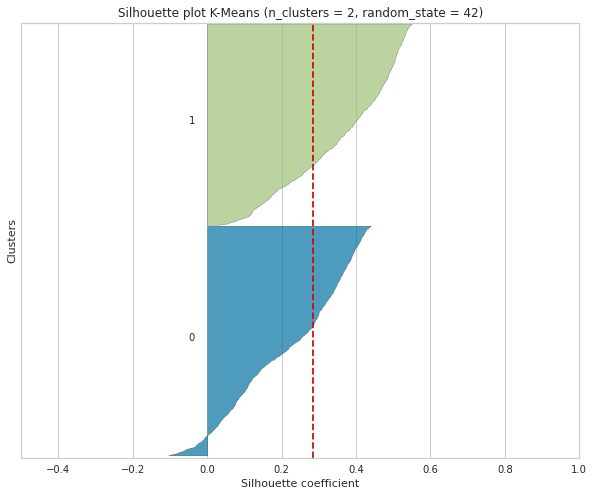

Silhouette score: 0.283640998703693

Inertia: 3696.8632807765707

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5500.413390,9283.800213,21.197202
1,1,10120.527339,4570.527339,17.090893


In [27]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 7

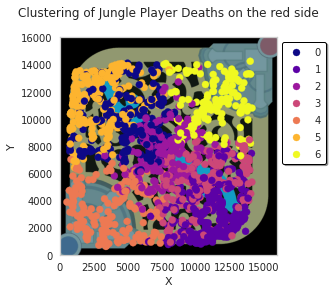

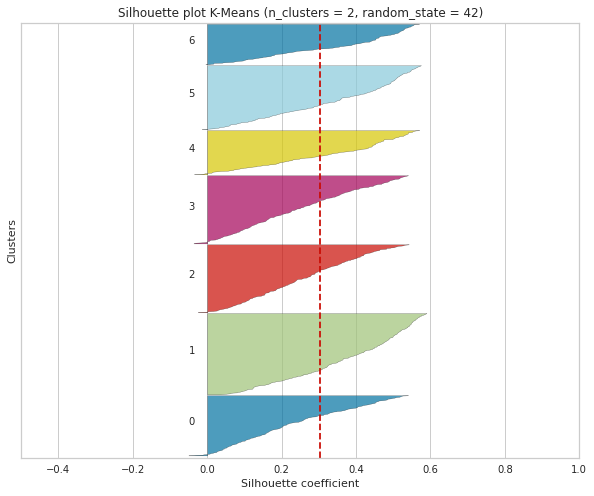

Silhouette score: 0.30251619317448253

Inertia: 1379.772282469269

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5116.228916,9641.136546,26.383448
1,1,11053.559524,3385.184524,10.833033
2,2,7586.341637,7469.896797,13.716147
3,3,10433.684397,5156.638298,24.813624
4,4,3910.715847,3366.453552,28.439489
5,5,3178.860377,11127.833962,10.929026
6,6,11220.392857,10960.625000,28.873193


In [28]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 5

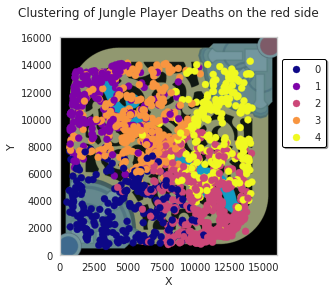

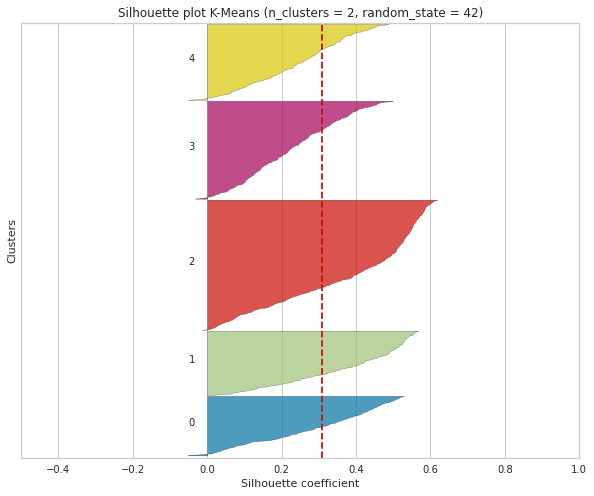

Silhouette score: 0.3078399022369275

Inertia: 1806.2525796750274

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4773.373984,3612.276423,28.219796
1,1,3389.483019,10996.452830,10.002932
2,2,10276.319030,4297.050373,12.075032
3,3,5928.301980,9350.839109,22.741599
4,4,11276.290735,8351.316294,27.986269


In [29]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

#### | Division - Gold |

**Red Side**

In [41]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

In [42]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
2889,EUW1_6274465314,Red,anonymous 129,euw1,Maokai,11.513217,6641.0,7209.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2920,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,8.982983,7920.0,7566.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2934,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,16.199850,7563.0,14015.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2940,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,19.408433,9840.0,5767.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2945,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,20.767800,9324.0,3640.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618703,EUW1_6287503036,Red,anonymous 172,euw1,Singed,37.131050,4968.0,9572.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618744,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,22.854233,11768.0,3484.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618749,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,26.166817,10533.0,9783.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618753,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,28.940083,7887.0,13567.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold


In [43]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 94 matches in which the jungler died at least once


In [44]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

5 players died a total of 572 times on the red side


In [45]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
2889,6641.0,7209.0,11.513217
2920,7920.0,7566.0,8.982983
2934,7563.0,14015.0,16.199850
2940,9840.0,5767.0,19.408433
2945,9324.0,3640.0,20.767800
...,...,...,...
618703,4968.0,9572.0,37.131050
618744,11768.0,3484.0,22.854233
618749,10533.0,9783.0,26.166817
618753,7887.0,13567.0,28.940083


Normalize Data:

In [46]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-0.43867932, -0.0417736 , -0.83596252],
       [-0.04349332,  0.06678248, -1.11037484],
       [-0.15379934,  2.02778569, -0.32768138],
       ...,
       [ 0.76387261,  0.74092484,  0.75326969],
       [-0.05368968,  1.89155846,  1.05403978],
       [-0.81470854,  1.03679337, -0.85405797]])

In [53]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2568031859958905
Silhouette score for k=3: 0.2781153850576221
Silhouette score for k=4: 0.2962087158129117
Silhouette score for k=5: 0.279781468975744
Silhouette score for k=6: 0.28494122325609156
Silhouette score for k=7: 0.2971589058030089
Silhouette score for k=8: 0.29444639374084475
Silhouette score for k=9: 0.29713165994666313
Silhouette score for k=10: 0.297516241228692
Silhouette score for k=11: 0.27724242564118534
Silhouette score for k=12: 0.285586011132697
Silhouette score for k=13: 0.2757428365009215
Silhouette score for k=14: 0.2845053070502665
Silhouette score for k=15: 0.27509534162092736
Silhouette score for k=16: 0.2808455800488879
Silhouette score for k=17: 0.2757431479190256
Silhouette score for k=18: 0.27933740226225257
Silhouette score for k=19: 0.2835143641046526
Silhouette score for k=20: 0.2753817563867384
Silhouette score for k=25: 0.27689896211653386


K-Means with k = 4

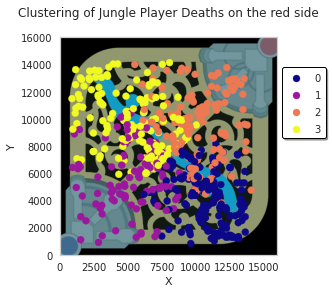

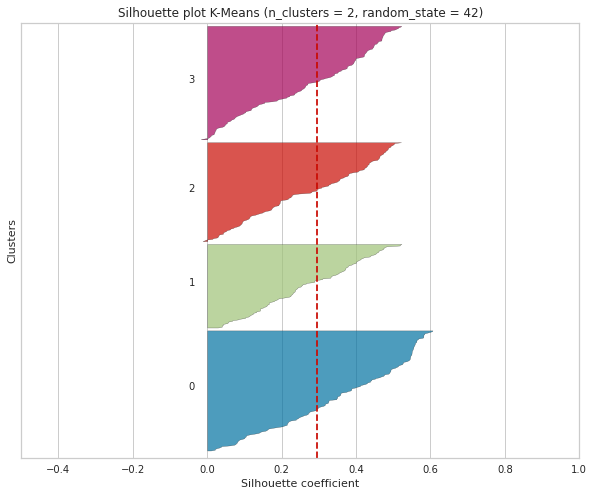

Silhouette score: 0.2962087158129117

Inertia: 718.5440338340055

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10744.127273,4298.448485,13.479339
1,1,5395.817391,5891.373913,26.335717
2,2,10162.691176,9511.698529,27.829100
3,3,5354.685897,9755.032051,12.545519


In [48]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

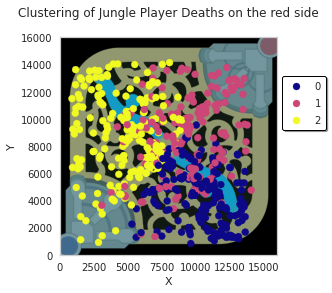

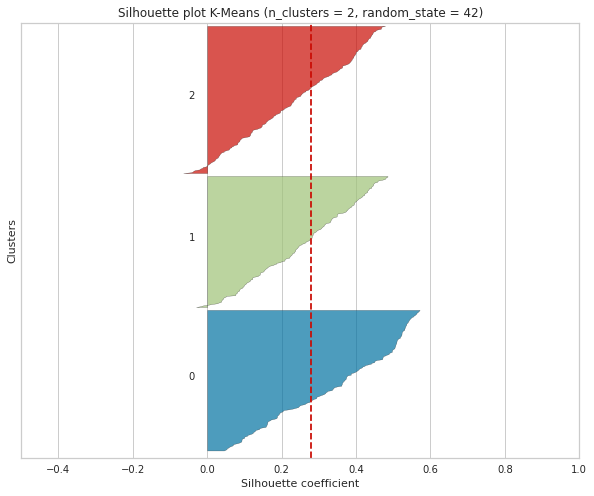

Silhouette score: 0.2781153850576221

Inertia: 916.7433250160673

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10273.609375,4541.890625,13.545317
1,1,9326.843575,8732.932961,28.444718
2,2,4819.497512,8790.497512,16.429113


In [49]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

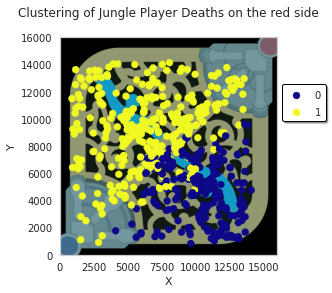

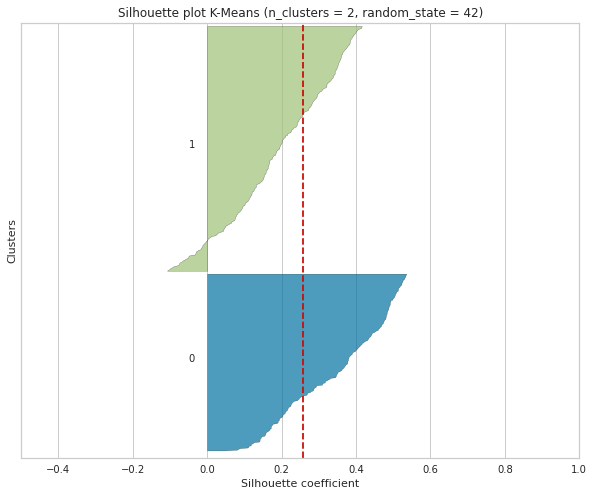

Silhouette score: 0.2568031859958905

Inertia: 1228.7593682310242

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10186.050000,4815.72500,15.591411
1,1,6524.412651,9175.76506,21.845236


In [50]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 7

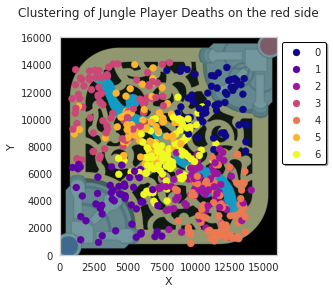

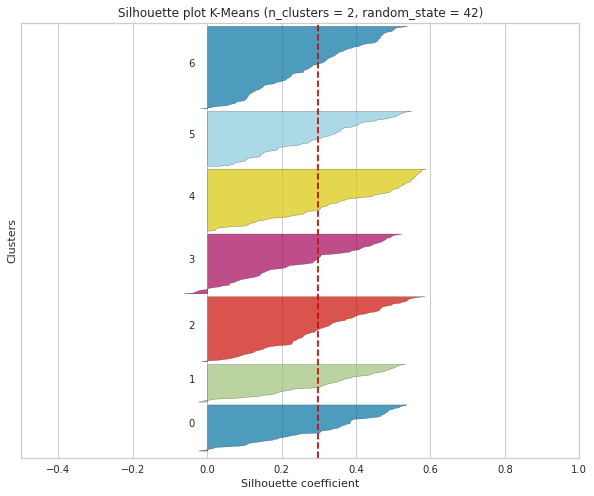

Silhouette score: 0.2971589058030089

Inertia: 459.13898701089914

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11160.415385,11062.030769,29.192538
1,1,4281.452830,4099.849057,26.984998
2,2,10298.483516,5065.450549,25.019254
3,3,4010.642857,10963.678571,11.919255
4,4,11550.425287,3591.965517,10.143006
5,5,6148.415584,9429.922078,26.734653
6,6,7878.626087,7350.382609,12.590067


In [51]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 9

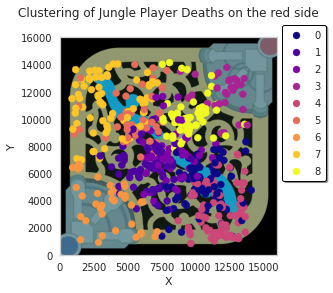

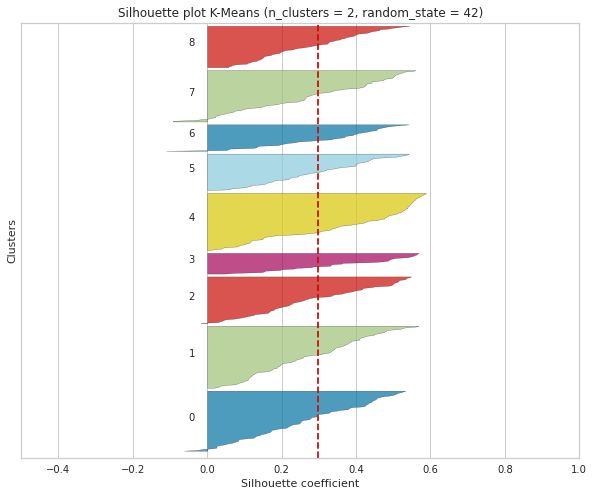

Silhouette score: 0.29713165994666313

Inertia: 385.0456688777343

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10570.894118,5192.070588,25.418335
1,1,6796.227273,6535.465909,18.955625
2,2,8295.060606,7483.954545,6.997556
3,3,11982.100000,11852.933333,33.588317
4,4,11681.000000,3301.456790,11.041439
5,5,5447.230769,10060.173077,28.523021
6,6,3762.263158,3707.078947,29.042951
7,7,3731.123288,10993.232877,12.031604
8,8,9533.406780,10207.288136,22.659703


In [55]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 10

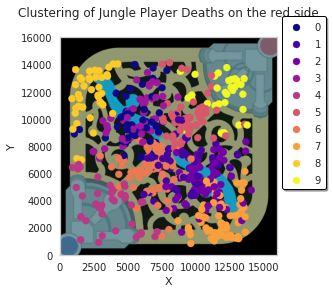

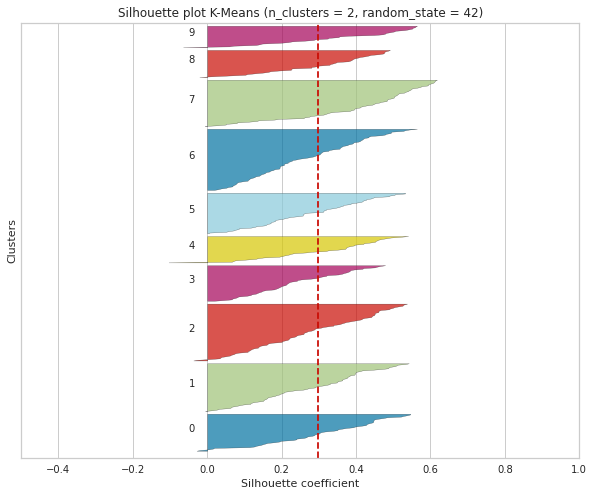

Silhouette score: 0.297516241228692

Inertia: 356.4374280395431

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5640.849057,9917.867925,28.466284
1,1,9201.735294,6676.705882,7.637376
2,2,10646.148148,5328.358025,25.650522
3,3,5585.529412,10073.784314,10.177686
4,4,3762.263158,3707.078947,29.042951
5,5,9535.431034,10190.965517,22.295649
6,6,6912.241379,6245.689655,18.818060
7,7,11860.196970,2701.863636,11.509242
8,8,2305.384615,11763.871795,13.741230
9,9,11896.935484,11763.580645,33.557393


In [56]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

#### | Division - Platinum |

**Red Side**

In [57]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

In [58]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
45854,EUW1_6279888483,Red,anonymous 161,euw1,Vi,3.058550,1727.0,13059.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
45858,EUW1_6279888483,Red,anonymous 161,euw1,Vi,5.382433,8271.0,10336.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
45867,EUW1_6279888483,Red,anonymous 161,euw1,Vi,9.375100,11490.0,4658.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
45871,EUW1_6279888483,Red,anonymous 161,euw1,Vi,11.742233,10558.0,926.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
45877,EUW1_6279888483,Red,anonymous 161,euw1,Vi,14.248350,12116.0,6532.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642176,EUW1_6289606636,Red,anonymous 165,euw1,Elise,5.202500,3525.0,11256.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642193,EUW1_6289606636,Red,anonymous 165,euw1,Elise,13.974000,9367.0,7246.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642197,EUW1_6289606636,Red,anonymous 165,euw1,Elise,15.285900,9388.0,2367.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum
642214,EUW1_6289606636,Red,anonymous 165,euw1,Elise,22.387483,8022.0,758.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Platinum


In [59]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 280 matches in which the jungler died at least once


In [60]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

9 players died a total of 1759 times on the red side


In [61]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
45854,1727.0,13059.0,3.058550
45858,8271.0,10336.0,5.382433
45867,11490.0,4658.0,9.375100
45871,10558.0,926.0,11.742233
45877,12116.0,6532.0,14.248350
...,...,...,...
642176,3525.0,11256.0,5.202500
642193,9367.0,7246.0,13.974000
642197,9388.0,2367.0,15.285900
642214,8022.0,758.0,22.387483


Normalize Data:

In [62]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-1.88257992,  1.6942049 , -1.75177302],
       [ 0.02445319,  0.89809293, -1.48538278],
       [ 0.96252464, -0.76195985, -1.02769739],
       ...,
       [ 0.34996602, -1.43176981, -0.3501335 ],
       [-0.04810966, -1.90218632,  0.46393168],
       [-1.12664412, -1.62619304,  0.79262415]])

In [63]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.27556804034346166
Silhouette score for k=3: 0.29375385532547954
Silhouette score for k=4: 0.33184275169214733
Silhouette score for k=5: 0.2886326991556462
Silhouette score for k=6: 0.2879281794924068
Silhouette score for k=7: 0.29147001671839684
Silhouette score for k=8: 0.2739246873685923
Silhouette score for k=9: 0.2775425669496668
Silhouette score for k=10: 0.27526535603226476
Silhouette score for k=11: 0.2788213409684998
Silhouette score for k=12: 0.26515984747550664
Silhouette score for k=13: 0.26738242961155856
Silhouette score for k=14: 0.26453203778473383
Silhouette score for k=15: 0.26621674885193036
Silhouette score for k=16: 0.26284587184154196
Silhouette score for k=17: 0.259416397436362
Silhouette score for k=18: 0.26341777888906576
Silhouette score for k=19: 0.2523422860839148
Silhouette score for k=20: 0.2612909278772772
Silhouette score for k=25: 0.26128062084643855


K-Means with k = 4

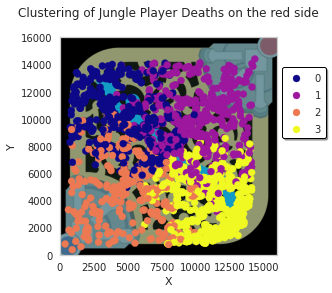

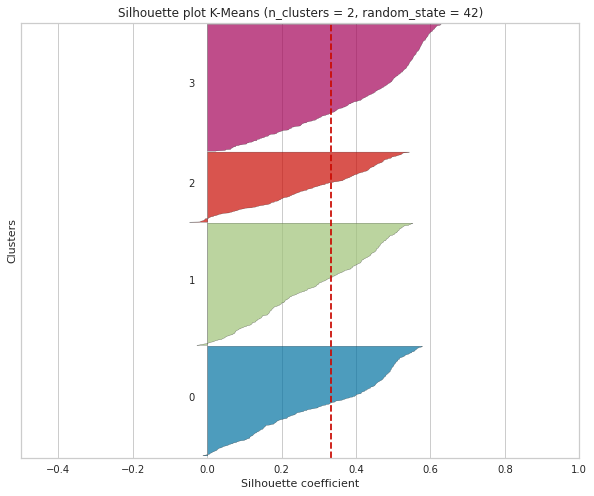

Silhouette score: 0.33184275169214733

Inertia: 2074.080935620884

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5001.500000,9920.493333,12.212138
1,1,9996.475050,9492.896208,25.422660
2,2,5081.649306,4827.486111,26.500494
3,3,10920.509615,4167.742308,12.300533


In [64]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

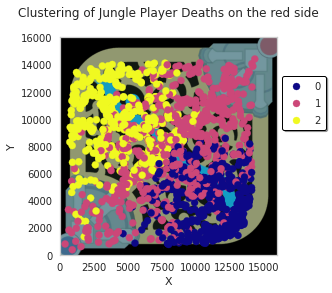

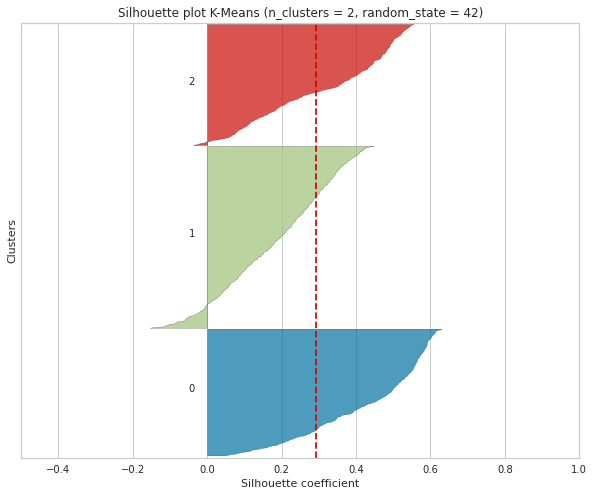

Silhouette score: 0.29375385532547954

Inertia: 2734.462405364211

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10794.315992,4104.375723,11.944698
1,1,8609.327957,7805.254032,26.112628
2,2,4825.602823,9758.921371,13.374074


In [65]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

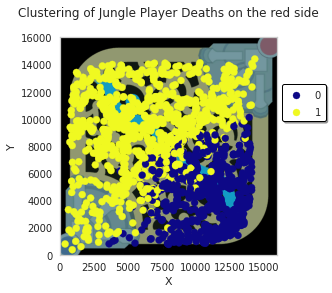

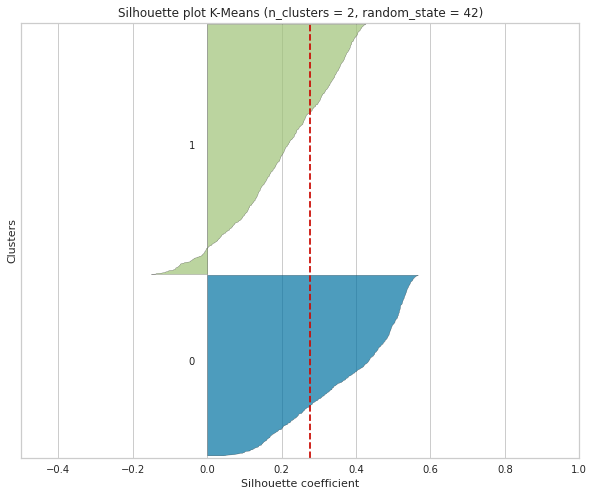

Silhouette score: 0.27556804034346166

Inertia: 3715.6656694773874

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10532.302168,4646.639566,14.688072
1,1,6491.919687,9156.204701,20.980252


In [66]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 7

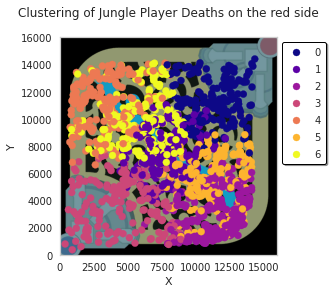

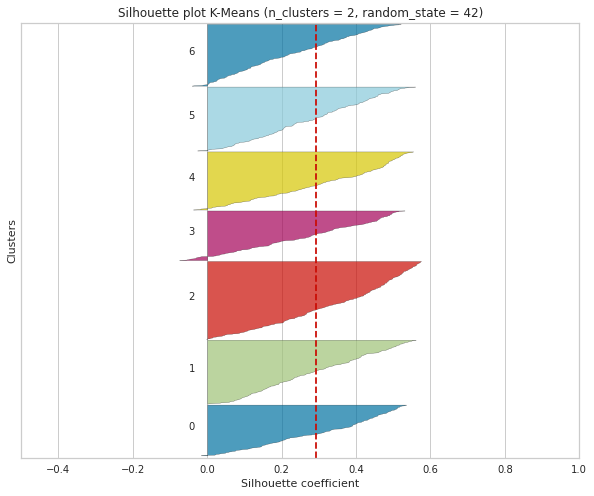

Silhouette score: 0.29147001671839684

Inertia: 1391.5351968994482

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11149.576190,11110.476190,26.591035
1,1,7910.719697,7464.776515,11.772128
2,2,11399.744548,3415.115265,10.017948
3,3,4851.356098,3782.702439,26.571609
4,4,3509.354167,10824.416667,10.700466
5,5,10966.174242,5694.871212,22.715321
6,6,6196.419608,9807.027451,24.865794


In [67]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 9

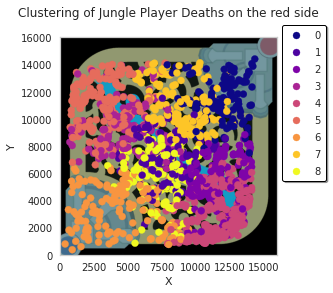

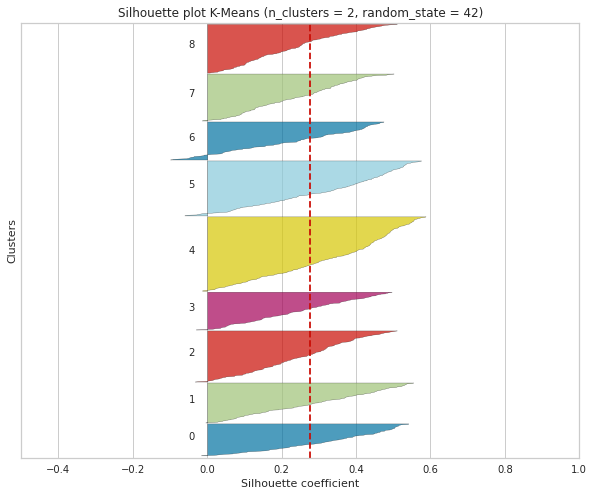

Silhouette score: 0.2775425669496668

Inertia: 1209.0224486934844

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11784.473684,11291.157895,29.307869
1,1,7907.228916,7305.861446,8.077419
2,2,11447.207547,5680.448113,23.416929
3,3,5179.356688,9405.891720,27.314523
4,4,11540.272727,3417.454545,10.097735
5,5,3408.328947,10828.100877,10.828393
6,6,4509.525316,3432.443038,27.870507
7,7,8790.743590,10753.861538,20.440835
8,8,7539.524752,6047.108911,18.814794


In [68]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 10

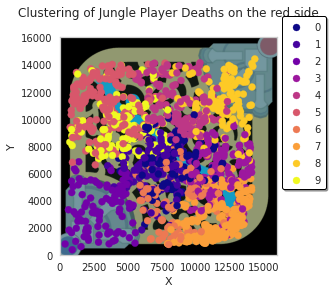

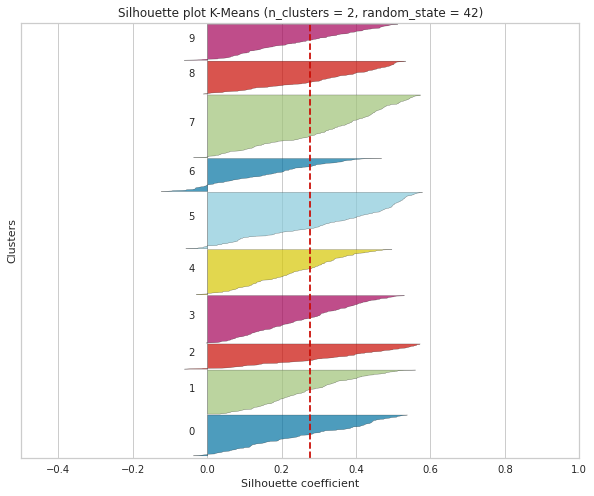

Silhouette score: 0.27526535603226476

Inertia: 1130.2952691316684

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8438.964706,6836.788235,7.725254
1,1,7175.639344,6541.918033,18.340345
2,2,3101.533333,3471.219048,26.722117
3,3,11599.238579,6011.121827,19.977052
4,4,8730.796791,10892.919786,20.646386
5,5,3511.807692,10792.816239,10.501032
6,6,8756.481752,4214.773723,28.528013
7,7,11599.861538,3036.007692,9.936745
8,8,11868.992701,11075.218978,29.405109
9,9,5010.308725,9550.503356,26.921135


In [69]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df